In [ ]:
# для локального прогона требуется модуль с линейныым программированием
!pip install pulp

In [ ]:
# модель быть полезены генетически алгоритмы
!pip install optuna

In [1]:
import numpy as np
import pandas as pd

import datetime

import os
import ast
from math import ceil
import random

# import optuna
# import logging
# optuna.logging.set_verbosity(logging.WARNING)

from pulp import LpProblem, LpVariable, LpMinimize, lpSum, PULP_CBC_CMD

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)
pd.set_option("max_colwidth", 100)

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

C:\Users\EdelweissPc\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\EdelweissPc\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\EdelweissPc\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# загрузка исходных данных
df = pd.read_csv('df_hack_final.csv')
df['MEAS_DT'] = pd.to_datetime(df['MEAS_DT'])
df['MEAS_date'] = df['MEAS_DT'].dt.date
print(df.shape)
df.head()

(30336, 131)


,MEAS_DT,Cu_oreth,Ni_oreth,Ore_mass,Mass_1,Mass_2,Dens_4,Mass_4,Vol_4,Cu_4F,Ni_4F,Ni_4.1C,Ni_4.1C_max,Ni_4.1C_min,Ni_4.1T,Ni_4.1T_max,Ni_4.1T_min,FM_4.1_A,Ni_4.2C,Ni_4.2C_max,Ni_4.2C_min,Ni_4.2T,Ni_4.2T_max,Ni_4.2T_min,FM_4.2_A,Dens_5,Mass_5,Vol_5,Ni_5F,Ni_5.1C,Ni_5.1C_max,Ni_5.1C_min,Ni_5.1T,Ni_5.1T_max,Ni_5.1T_min,FM_5.1_A,Ni_5.2C,Ni_5.2C_max,Ni_5.2C_min,Ni_5.2T,Ni_5.2T_max,Ni_5.2T_min,FM_5.2_A,Dens_6,Mass_6,Vol_6,Ni_6F,Ni_6.1C,Ni_6.1C_max,Ni_6.1C_min,Ni_6.1T,Ni_6.1T_max,Ni_6.1T_min,FM_6.1_A,Ni_6.2C,Ni_6.2C_max,Ni_6.2C_min,Ni_6.2T,Ni_6.2T_max,Ni_6.2T_min,FM_6.2_A,Cu_resth,Ni_resth,Cu_1.1C,Ni_1.1C,Cu_1.2C,Ni_1.2C,Cu_2F,Ni_2F,Cu_2.1C,Ni_2.1C,Cu_2.2C,Ni_2.2C,Cu_3F,Ni_3F,Cu_3.1C,Ni_3.1C,Cu_3.2C,Ni_3.2C,Cu_2.1T,Ni_2.1T,Cu_2.2T,Ni_2.2T,Cu_3.1T,Ni_3.1T,Cu_3.2T,Ni_3.2T,Dens_3,Dens_1,Dens_2,Mass_3,FM_1.1_A,Cu_1.1C_max,Cu_1.1C_min,Ni_1.1C_max,Ni_1.1C_min,Ni_1.1T_max,Ni_1.1T_min,FM_1.2_A,Cu_1.2C_max,Cu_1.2C_min,Ni_1.2C_max,Ni_1.2C_min,Ni_1.2T_max,Ni_1.2T_min,FM_2.1_A,Cu_2.1C_max,Cu_2.1C_min,Cu_2.1T_max,Cu_2.1T_min,FM_2.2_A,Cu_2.2C_max,Cu_2.2C_min,Cu_2.2T_max,Cu_2.2T_min,FM_3.1_A,Cu_3.1C_max,Cu_3.1C_min,Ni_3.1C_max,Ni_3.1C_min,Cu_3.1T_max,Cu_3.1T_min,FM_3.2_A,Cu_3.2C_max,Cu_3.2C_min,Ni_3.2C_max,Ni_3.2C_min,Cu_3.2T_max,Cu_3.2T_min,Ni_rec,MEAS_date
0,2024-01-01 00:00:00,2.6097,1.5313,1096.5,1240.597656,692.090942,1.342155,711.999023,1548.71875,0.6232,2.4937,4.1826,NaN,NaN,0.7136,NaN,NaN,NaN,3.8121,NaN,NaN,0.7602,NaN,NaN,NaN,1.346855,476.127625,1021.624939,3.99735,6.2100,NaN,NaN,0.7943,NaN,NaN,NaN,6.7906,NaN,NaN,0.7694,NaN,NaN,NaN,1.344661,219.958878,474.96875,9.09595,9.0939,NaN,NaN,1.3531,NaN,NaN,NaN,9.0980,NaN,NaN,1.2932,NaN,NaN,NaN,1.8008,8.2067,4.4612,2.5949,5.0066,2.9721,4.5836,2.7272,18.0072,2.8705,17.5073,2.5247,13.5003,2.8885,14.3382,2.8217,14.9352,2.7402,0.6405,2.0980,0.4005,2.7056,1.6723,3.9535,1.7310,4.4555,0.808328,1.388724,1.397016,1159.946120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01
1,2024-01-01 00:15:00,2.5548,1.4842,1123.0,1205.422363,693.616394,1.339809,710.697815,1556.56250,0.6292,2.5157,4.1037,4.7,4.5,0.7247,0.77,0.67,0.0,3.7383,4.7,4.2,0.7585,0.75,0.68,0.0,1.342700,473.042267,1027.312500,3.92100,6.3300,6.5,6.3,0.8009,0.75,0.68,0.0,6.6420,6.5,6.3,0.7743,0.75,0.65,0.0,1.335838,275.753723,611.09375,9.02795,9.0422,9.5,9.0,1.3338,1.45,1.4,0.0,9.0137,9.5,9.0,1.3044,1.5,1.4,0.0,1.8160,7.8830,4.5157,2.5875,5.1750,3.0450,4.4472,2.7258,18.1457,2.8092,17.4514,2.4793,13.4167,2.9271,14.1753,2.8282,14.6916,2.7704,0.6740,2.0389,0.3986,2.7757,1.4766,3.9686,1.8037,4.2734,0.807156,1.375562,1.397872,1189.409024,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,17.0,16.0,0.45,0.34,0.0,17.0,16.0,0.42,0.34,0.0,15.5,14.5,3.9,3.7,1.0,0.8,0.0,14.0,12.0,3.7,3.5,1.2,1.0,NaN,2024-01-01
2,2024-01-01 00:30:00,2.5109,1.4355,840.0,1188.762573,698.350586,1.339792,707.198547,1548.09375,0.5941,2.5253,4.1911,4.7,4.5,0.7069,0.77,0.67,0.0,3.7132,4.7,4.2,0.7613,0.75,0.68,0.0,1.342700,472.912659,1026.937500,3.95215,6.2619,6.5,6.3,0.7829,0.75,0.68,0.0,6.5325,6.5,6.3,0.7582,0.75,0.65,0.0,1.312747,263.925659,626.93750,8.95510,8.9666,9.5,9.0,1.2827,1.45,1.4,0.0,8.9436,9.5,9.0,1.2598,1.5,1.4,0.0,1.9386,7.7173,4.4968,2.6646,5.1975,3.0923,4.4774,2.7327,16.3150,2.7114,17.3994,2.4534,13.6483,2.8914,13.9210,2.8325,14.5276,2.7553,0.7055,2.0604,0.3968,2.7219,1.2512,4.0164,1.6489,4.4432,0.797312,1.371214,1.399892,1247.048316,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,5.0,4.7,3.2,2.7,0.15,0.12,0.0,17.0,16.0,0.45,0.34,0.0,17.0,16.0,0.42,0.34,0.0,15.5,14.5,3.9,3.7,1.0,0.8,0.0,14.0,12.0,3.7,3.5,1.2,1.0,0.970170,2024-01-01
3,2024-01-01 00:45:00,2.4765,1.3852,824.0,1151.888672,714.678101,1.342392,707.865540,1538.87500,0.6682,2.5418,4.1268,4.7,4.5,0.7097,0.77,0.67,0.0,3.7086,4.7,4.2,0.7412,0.75,0.68,0.0,1.342075,475.598877,1034.750000,3.91770,6.0307,6.5,6.3,0.7576,0.75,0.68,0.0,6.7853,6.5,6.3,0.7656,0.75,0.65,0.0,1.317930,250.852905,586.18750,8.93175

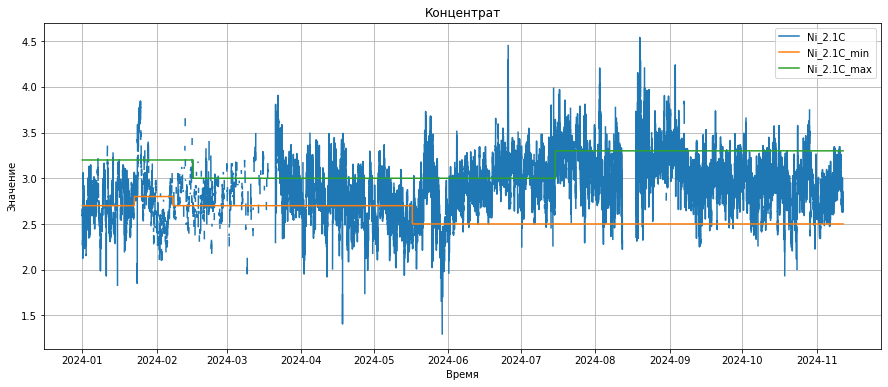

In [3]:
# Характерное значение для изменения диапазона параметров машины может составлять МЕСЯЦЫ
plt.figure(figsize=(15, 6))

plt.plot(df['MEAS_DT'], df['Ni_1.1C'], label='Ni_2.1C')
plt.plot(df['MEAS_DT'], df['Ni_1.1C_min'], label='Ni_2.1C_min')
plt.plot(df['MEAS_DT'], df['Ni_1.1C_max'], label='Ni_2.1C_max')


plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Концентрат')
plt.legend()
plt.grid(True)
plt.show()

<Axes: ylabel='Density'>

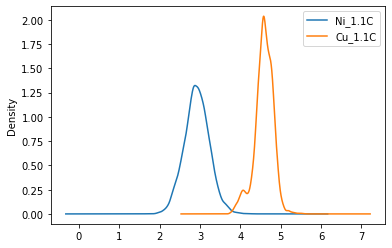

In [4]:
# функции распределения в большинстве своем похожи на норм.распр.
df[['Ni_1.1C', 'Cu_1.1C']].plot(kind='density')

### Линейное программирование

In [5]:
# признаки для прогноза
conc_features = ['Cu_1.1C', 'Cu_1.2C', 'Cu_2.1T','Cu_2.2T',
                 'Cu_3.1T', 'Cu_3.2T', 'Ni_1.1C', 'Ni_1.2C',
                 'Ni_4.1C', 'Ni_4.1T','Ni_4.2C', 'Ni_4.2T',
                 'Ni_5.1C', 'Ni_5.1T', 'Ni_5.2C', 'Ni_5.2T',
                 'Ni_6.1C', 'Ni_6.1T', 'Ni_6.2C', 'Ni_6.2T']

# исходные данные схлопнутые до шага в 2 часа
df_resampled = df[['MEAS_DT'] + conc_features].set_index('MEAS_DT').round(2).resample('2H').mean()#.reset_index()
print(df_resampled.shape)
 
# заполнение пробелов в данных усреднением по 3-м суткам
window_size_for_nan_replacement = 72 
df_resampled_filled = df_resampled.apply(lambda col: col.fillna(col.rolling(window = window_size_for_nan_replacement,
                                                                            min_periods=1).mean()), axis=0)
df_resampled_filled = df_resampled_filled.round(3)
df_resampled_filled.reset_index(inplace=True)
print(df_resampled_filled.shape)
df_resampled_filled.head()

(3792, 20)
(3792, 21)


,MEAS_DT,Cu_1.1C,Cu_1.2C,Cu_2.1T,Cu_2.2T,Cu_3.1T,Cu_3.2T,Ni_1.1C,Ni_1.2C,Ni_4.1C,Ni_4.1T,Ni_4.2C,Ni_4.2T,Ni_5.1C,Ni_5.1T,Ni_5.2C,Ni_5.2T,Ni_6.1C,Ni_6.1T,Ni_6.2C,Ni_6.2T
0,2024-01-01 00:00:00,4.532,4.881,0.682,0.400,1.119,1.530,2.604,2.898,4.148,0.714,3.755,0.754,6.130,0.762,6.712,0.762,9.178,1.348,9.050,1.394
1,2024-01-01 02:00:00,4.559,4.285,0.526,0.403,1.166,1.065,2.333,2.501,4.131,0.704,3.847,0.753,6.080,0.730,6.751,0.751,9.518,1.416,9.239,1.577
2,2024-01-01 04:00:00,4.524,4.009,0.606,0.422,1.005,1.302,2.240,2.336,4.134,0.708,3.860,0.770,6.149,0.734,6.610,0.735,9.522,1.427,9.282,1.580
3,2024-01-01 06:00:00,4.643,4.899,0.501,0.397,2.044,2.301,2.823,2.956,4.051,0.716,3.740,0.763,6.100,0.739,6.350,0.739,9.538,1.459,9.184,1.633
4,2024-01-01 08:00:00,4.728,5.226,0.534,0.379,0.110,0.752,2.988,3.160,4.048,0.720,3.902,0.795,6.066,0.759,6.608,0.750,9.382,1.449,9.108,1.626


In [6]:
df_resampled_filled.isnull().sum()

MEAS_DT    0
Cu_1.1C    0
Cu_1.2C    0
Cu_2.1T    0
Cu_2.2T    0
Cu_3.1T    0
Cu_3.2T    0
Ni_1.1C    0
Ni_1.2C    0
Ni_4.1C    0
Ni_4.1T    0
Ni_4.2C    0
Ni_4.2T    0
Ni_5.1C    0
Ni_5.1T    0
Ni_5.2C    0
Ni_5.2T    0
Ni_6.1C    0
Ni_6.1T    0
Ni_6.2C    0
Ni_6.2T    0
dtype: int64

In [7]:
T = df_resampled_filled.shape[0]      # Количество временных шагов
N = df_resampled_filled.shape[1] - 1  # Количество временных рядов от максимума df_resampled_filled.shape[1] - 1

# дискретные шаги изменения параметров
step_sizes = [0.1, 0.1,        # Cu_1.*C
              0.01, 0.01,      # Cu_2.*T
              0.05, 0.05,      # Cu_3.*T
              0.1, 0.1,        # Ni_1.*C
              0.05, 0.01,      # Ni_4.1C, Ni_4.1T
              0.05, 0.01,      # Ni_4.2C, Ni_4.2T
              0.05, 0.01,      # Ni_5.1C, Ni_5.1T
              0.05, 0.01,      # Ni_5.2C, Ni_5.2T
              0.05, 0.01,      # Ni_6.1C, Ni_6.1T
              0.05, 0.01,      # Ni_6.2C, Ni_6.2T
             ][:N]  # Индивидуальный шаг изменения для каждого ряда

# Проверяем, что количество step_sizes соответствует числу рядов
assert len(step_sizes) == N, "Количество step_sizes должно соответствовать количеству временных рядов"

# матрица признаков
Y = np.array(df_resampled_filled.iloc[:,1:].T, dtype=float)
Y

array([[4.532, 4.559, 4.524, ..., 4.6  , 4.592, 4.515],
       [4.881, 4.285, 4.009, ..., 4.601, 4.745, 4.744],
       [0.682, 0.526, 0.606, ..., 0.334, 0.324, 0.32 ],
       ...,
       [1.348, 1.416, 1.427, ..., 1.535, 1.54 , 1.538],
       [9.05 , 9.239, 9.282, ..., 9.074, 9.274, 9.311],
       [1.394, 1.577, 1.58 , ..., 1.536, 1.472, 1.466]])

In [8]:
# у каждой границы диапазона есть собственный диапазон начений, которые она может принимать.
# установим эти границы на базе статистик потоков
feature_stats = df_resampled_filled.iloc[:,1:].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9])
A_lower_boundaries, A_upper_boundaries = feature_stats[feature_stats.index == 'min'].values[0], feature_stats[feature_stats.index == '40%'].values[0]
B_lower_boundaries, B_upper_boundaries = feature_stats[feature_stats.index == 'mean'].values[0], feature_stats[feature_stats.index == 'max'].values[0]
A_lower_boundaries

array([3.797, 3.874, 0.25 , 0.34 , 0.061, 0.116, 1.65 , 1.708, 3.155,
       0.53 , 2.308, 0.55 , 4.695, 0.592, 4.076, 0.45 , 5.638, 1.047,
       6.   , 0.55 ])

In [9]:
# Создание модели
model = LpProblem("Optimize_Multiple_Ranges", LpMinimize)

# Переменные для границ диапазона
A = [[LpVariable(f"A_{t}_{i}", lowBound=A_lower_boundaries[i], upBound=A_upper_boundaries[i]) for t in range(T)] for i in range(N)]
B = [[LpVariable(f"B_{t}_{i}", lowBound=B_lower_boundaries[i], upBound=B_upper_boundaries[i]) for t in range(T)] for i in range(N)]

# Переменные для штрафов за выход из диапазона
e_plus = [[LpVariable(f"e_plus_{t}_{i}", lowBound=0) for t in range(T)] for i in range(N)]
e_minus = [[LpVariable(f"e_minus_{t}_{i}", lowBound=0) for t in range(T)] for i in range(N)]

# добавляем мягкие и жесткие критерии оптимизации
for i in range(N):
    # Ограничения для каждого ряда
    for t in range(T):
        
        # отклонение за верхний диапазон
        model += e_plus[i][t] >= Y[i][t] - B[i][t]

        # отклонение за нижний диапазон
        model += e_minus[i][t] >= A[i][t] - Y[i][t]

        # Если Y[i][t] внутри диапазона, то штрафы равны нулю
        model += e_plus[i][t] >= 0
        model += e_minus[i][t] >= 0
        
    # Ограничения на шаг изменения границ (индивидуальный для каждого ряда)
    for t in range(2, T): 
        step_size = step_sizes[i]
        # Границы изменяются дискретно c собственным шагом
        
        model += A[i][t] - A[i][t - 2] == step_size
        model += A[i][t] - A[i][t - 2] == -step_size
        model += A[i][t] - A[i][t - 2] == 0
        
        
        model += B[i][t] - B[i][t - 2] == step_size
        model += B[i][t] - B[i][t - 2] == -step_size
        model += B[i][t] - B[i][t - 2] == 0
         

# Целевая функция: минимизация ширины диапазонов и штрафов за выход данных
range_width = lpSum(B[i][t] - A[i][t] for i in range(N) for t in range(T))
error_penalty = lpSum(e_plus[i][t] + e_minus[i][t] for i in range(N) for t in range(T))

model += error_penalty + range_width * 0.5
        
# Решение модели
model.solve(PULP_CBC_CMD(msg=True))

# Сбор полученного результата в виде датафрейма
results = []
for i in range(N):
    for t in range(T):
        delta_plus_t = max(0, Y[i][t] - (B[i][t].varValue or 0))
        delta_minus_t = max(0, (A[i][t].varValue or 0) - Y[i][t])
        range_error = delta_plus_t + delta_minus_t

        results.append({
            "Row": i,
            "Time": t,
            "Y": Y[i][t],
            "Lower_Bound": A[i][t].varValue,
            "Upper_Bound": B[i][t].varValue,
            
            "Range_Error": range_error
        })

# Формирование DataFrame
results_df = pd.DataFrame(results)
results_df

,Row,Time,Y,Lower_Bound,Upper_Bound,Range_Error
0,0,0,4.532,4.550,4.580097,0.018000
1,0,1,4.559,4.550,4.580097,0.000000
2,0,2,4.524,4.550,4.580097,0.026000
3,0,3,4.643,4.550,4.580097,0.062903
4,0,4,4.728,4.550,4.580097,0.147903
...,...,...,...,...,...,...
75835,19,3787,1.626,1.312,1.383742,0.242258
75836,19,3788,1.672,1.312,1.383742,0.288258
75837,19,3789,1.536,1.312,1.383742,0.152258
75838,19,3790,1.472,1.312,1.383742,0.088258


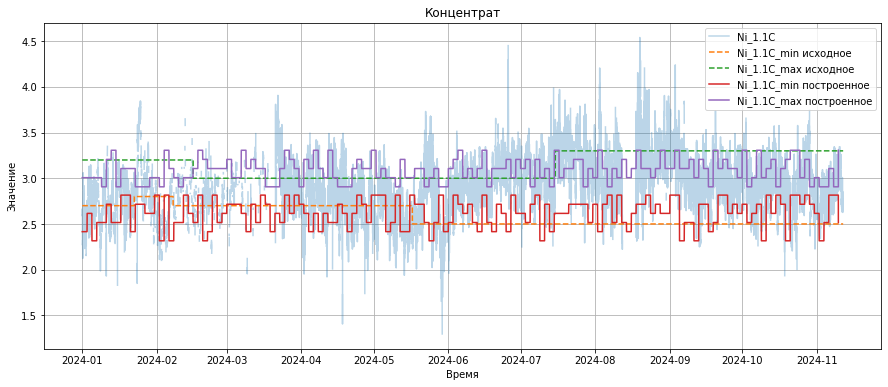

In [19]:
# результат построенного диапазона при корректировке раз в сутки
check_results = pd.read_csv('res_Ni_1.1C_extra.csv')


plt.figure(figsize=(15, 6))

plt.plot(df['MEAS_DT'], df['Ni_1.1C'], label='Ni_1.1C', alpha=0.3)
plt.plot(df['MEAS_DT'], df['Ni_1.1C_min'], label='Ni_1.1C_min исходное', linestyle='--')
plt.plot(df['MEAS_DT'], df['Ni_1.1C_max'], label='Ni_1.1C_max исходное', linestyle='--')
plt.plot(pd.to_datetime(check_results['Time']), check_results['Lower_Bound'], label='Ni_1.1C_min построенное')
plt.plot(pd.to_datetime(check_results['Time']), check_results['Upper_Bound'], label='Ni_1.1C_max построенное')

plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Концентрат')
plt.legend()
plt.grid(True)
plt.show()

### Генетический алгоритм NSGAII

In [20]:
conc_features = ['Cu_1.1C', 'Cu_1.2C', 'Cu_2.1T','Cu_2.2T',
                 'Cu_3.1T', 'Cu_3.2T', 'Ni_1.1C', 'Ni_1.2C',
                 'Ni_4.1C', 'Ni_4.1T','Ni_4.2C', 'Ni_4.2T',
                 'Ni_5.1C', 'Ni_5.1T', 'Ni_5.2C', 'Ni_5.2T',
                 'Ni_6.1C', 'Ni_6.1T', 'Ni_6.2C', 'Ni_6.2T']


step_sizes = {'Cu_1.1C':0.1, 'Cu_1.2C':0.1, 'Cu_2.1T':0.01,'Cu_2.2T':0.01,
             'Cu_3.1T':0.05, 'Cu_3.2T':0.05, 'Ni_1.1C':0.1, 'Ni_1.2C':0.1,
             'Ni_4.1C':0.05, 'Ni_4.1T':0.01,'Ni_4.2C':0.05, 'Ni_4.2T':0.01,
             'Ni_5.1C':0.05, 'Ni_5.1T':0.01, 'Ni_5.2C':0.05, 'Ni_5.2T':0.01,
             'Ni_6.1C':0.05, 'Ni_6.1T':0.01, 'Ni_6.2C':0.05, 'Ni_6.2T':0.01}

In [21]:
for target_to_predict in conc_features:
    # отдельный временной ряд
    ts_original = df[['MEAS_DT', target_to_predict]]
    ts = ts_original.set_index('MEAS_DT').resample('48H').mean()
    ts_stats = ts.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9]).T
    
    # сохраним время как отдельны признак
    date_feature = ts.index
    ts = list(ts[target_to_predict])
    
    # ограничения для границ диапазона
    A_init_min, A_init_max = ts_stats['min'][target_to_predict], ts_stats['40%'][target_to_predict]
    B_init_min, B_init_max = ts_stats['mean'][target_to_predict], ts_stats['max'][target_to_predict]

    T = len(ts)
    
    # начальный шаг для оптимизации выбираем случайным образом
    A_init = random.uniform(A_init_min, A_init_max)
    B_init = random.uniform(np.ceil(A_init), B_init_max)

    # Функция оценки
    def objective(trial):
        # Генерируем границы диапазонов
        A = [trial.suggest_float(f"A_{t}", A_init_min, A_init_max, step=step_sizes[target_to_predict]) for t in range(T)]
        B = [trial.suggest_float(f"B_{t}", B_init_min, B_init_max, step=step_sizes[target_to_predict]) for t in range(T)]

        # Инициализируем штрафы
        delta_plus = [0] * T
        delta_minus = [0] * T

        # Проверяем ограничения и вычисляем штрафы
        for t in range(T):
            # Условие на порядок границ
            if A[t] >= B[t]:
                return float("inf")  # Неправильный диапазон

            # Штрафы за выход данных за пределы диапазона
            delta_plus[t] = max(0, ts[t] - B[t])
            delta_minus[t] = max(0, A[t] - ts[t])

        # Целевая функция: минимизация ширины диапазона и штрафов
        range_width = sum(B[t] - A[t] for t in range(T))
        error_penalty = sum(delta_plus) + sum(delta_minus)


        return range_width + error_penalty

    # Запуск Optuna
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=150, timeout=360)

    # Получение результатов
    best_trial = study.best_trial
    A_optimal = [best_trial.params[f"A_{t}"] for t in range(T)]
    B_optimal = [best_trial.params[f"B_{t}"] for t in range(T)]

    # Добавляем ошибку выхода за диапазон 
    range_error = [max(0, y - b) + max(0, a - y) for y, a, b in zip(ts, A_optimal, B_optimal)]

    # Формирование DataFrame
    results = pd.DataFrame({
        "Time": list(date_feature),
        "Y": ts,
        "Lower_Bound": A_optimal,
        "Upper_Bound": B_optimal,
        "Delta_Plus": [max(0, y - b) for y, b in zip(ts, B_optimal)],
        "Delta_Minus": [max(0, a - y) for a, y in zip(A_optimal, ts)],
        "Range_Error": range_error,
    })

    # возвращаем оригинальный шаг по времени
    results = results.set_index('Time')[['Y', 'Lower_Bound', 'Upper_Bound']].resample('15min').asfreq().ffill().reset_index()
    results['feature'] = target_to_predict


Ni_1.1C
